**IMPORTING LIBRARIES USED IN BUILDING THE REGRESSION/TIME-SERIES MODEL**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime


In [2]:
df = pd.read_csv("Binance_ADA-USDT_day.csv")

In [3]:
df

,unix,date,symbol,Open,high,low,close,Volume ADA,Volume USDT,tradecount
0,1.626310e+12,7/15/2021 0:00,ADA/USDT,1.26340,1.26610,1.25380,1.25610,1.267227e+06,1.596240e+06,2483
1,1.626220e+12,7/14/2021 0:00,ADA/USDT,1.26490,1.28940,1.19800,1.26350,1.654669e+08,2.056139e+08,323301
2,1.626130e+12,7/13/2021 0:00,ADA/USDT,1.31260,1.32160,1.25000,1.26500,1.250157e+08,1.607155e+08,248079
3,1.626050e+12,7/12/2021 0:00,ADA/USDT,1.34850,1.37360,1.29160,1.31260,1.120676e+08,1.496609e+08,238866
4,1.625960e+12,7/11/2021 0:00,ADA/USDT,1.33560,1.36690,1.32310,1.34850,7.170426e+07,9.625201e+07,172388
...,...,...,...,...,...,...,...,...,...,...
1181,1.524270e+12,4/21/2018 0:00,ADA/USDT,0.30161,0.30700,0.26509,0.28668,9.271984e+07,2.653939e+07,55256
1182,1.524180e+12,4/20/2018 0:00,ADA/USDT,0.27004,0.30442,0.26648,0.30108,7.108428e+07,2.027089e+07,46506
1183,1.524100e+12,4/19/2018 0:00,ADA/USDT,0.26199,0.27500,0.25777,0.27004,5.085998e+07,1.360991e+07,32600
1184,1.524010e+12,4/18/2018 0:00,ADA/USDT,0.24260,0.26460,0.24201,0.26200,3.132810e+07,7.922134e+06,21684


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1186 non-null   float64
 1   date         1186 non-null   object 
 2   symbol       1186 non-null   object 
 3   Open         1186 non-null   float64
 4   high         1186 non-null   float64
 5   low          1186 non-null   float64
 6   close        1186 non-null   float64
 7   Volume ADA   1186 non-null   float64
 8   Volume USDT  1186 non-null   float64
 9   tradecount   1186 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 92.8+ KB


In [5]:
num_col = []
cat_col = []

for i in df.columns:
    if df[i].dtypes == "object":
        cat_col.append(i)
    else:
        num_col.append(i)

In [6]:
df.describe()

,unix,Open,high,low,close,Volume ADA,Volume USDT,tradecount
count,1.186000e+03,1186.000000,1186.000000,1186.000000,1186.000000,1.186000e+03,1.186000e+03,1.186000e+03
mean,1.575115e+12,0.259609,0.273668,0.244351,0.260455,3.012079e+08,1.313983e+08,1.868012e+05
std,2.959313e+10,0.436551,0.462437,0.407791,0.437509,3.056587e+08,3.479990e+08,3.983877e+05
min,1.523920e+12,0.023320,0.026500,0.017650,0.023290,1.267227e+06,9.955444e+05,2.483000e+03
25%,1.549520e+12,0.046488,0.048145,0.044760,0.046503,1.140625e+08,7.061366e+06,2.362700e+04
50%,1.575115e+12,0.082895,0.085440,0.079565,0.082895,2.047030e+08,1.590466e+07,4.344900e+04
75%,1.600710e+12,0.156223,0.162765,0.147872,0.156250,3.577792e+08,4.279295e+07,1.002975e+05
max,1.626310e+12,2.300200,2.470000,2.010400,2.300200,2.261842e+09,3.616451e+09,3.500994e+06


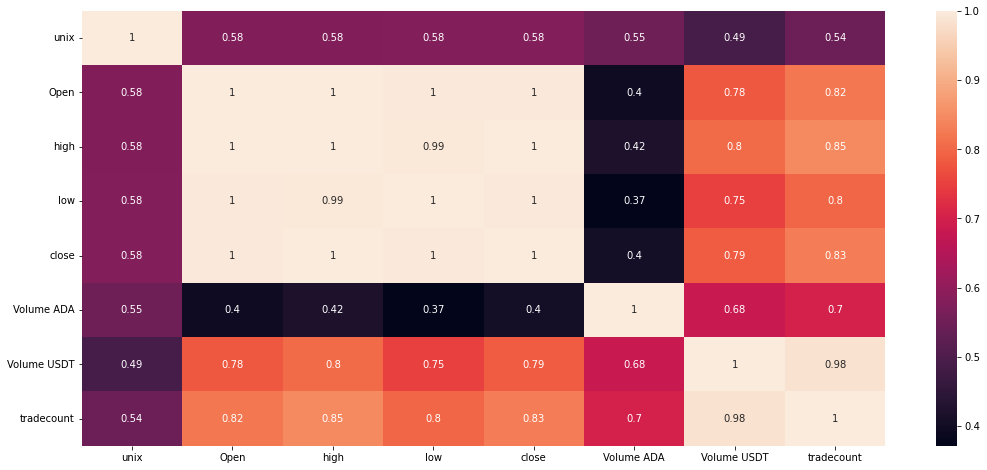

In [7]:
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [8]:
df.corr()

,unix,Open,high,low,close,Volume ADA,Volume USDT,tradecount
unix,1.000000,0.576737,0.577327,0.577477,0.578789,0.545592,0.486866,0.543707
Open,0.576737,1.000000,0.997751,0.995840,0.995894,0.395177,0.779280,0.822959
high,0.577327,0.997751,1.000000,0.994889,0.998451,0.418153,0.803833,0.845694
low,0.577477,0.995840,0.994889,1.000000,0.997074,0.371126,0.750514,0.796811
close,0.578789,0.995894,0.998451,0.997074,1.000000,0.404218,0.786200,0.830212
Volume ADA,0.545592,0.395177,0.418153,0.371126,0.404218,1.000000,0.680958,0.700939
Volume USDT,0.486866,0.779280,0.803833,0.750514,0.786200,0.680958,1.000000,0.983668
tradecount,0.543707,0.822959,0.845694,0.796811,0.830212,0.700939,0.983668,1.000000


df["avg"] = (df["Open"] + df["close"])/2
df["ADA_USDT"] = (df["Volume ADA"]/df["Volume USDT"]) * 100
df["USDT_ADA"] = (df["Volume USDT"]/df["Volume ADA"]) * 100

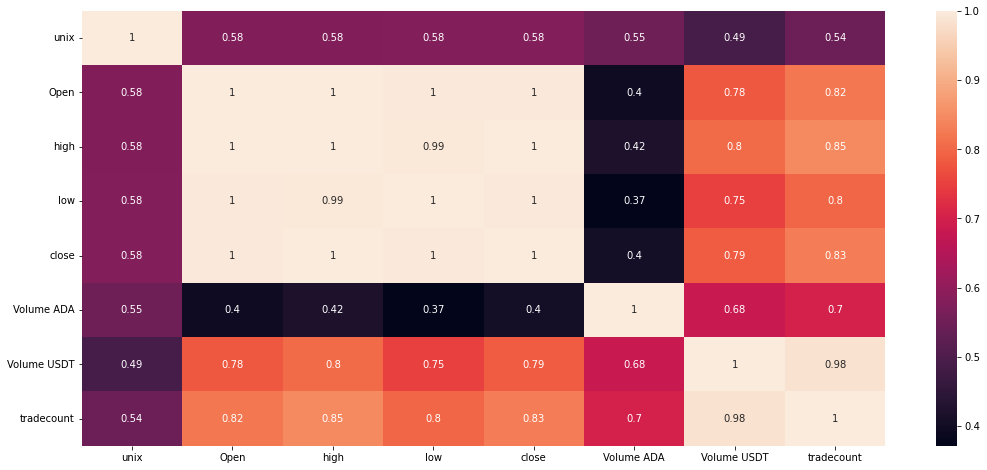

In [9]:
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [10]:
df

,unix,date,symbol,Open,high,low,close,Volume ADA,Volume USDT,tradecount
0,1.626310e+12,7/15/2021 0:00,ADA/USDT,1.26340,1.26610,1.25380,1.25610,1.267227e+06,1.596240e+06,2483
1,1.626220e+12,7/14/2021 0:00,ADA/USDT,1.26490,1.28940,1.19800,1.26350,1.654669e+08,2.056139e+08,323301
2,1.626130e+12,7/13/2021 0:00,ADA/USDT,1.31260,1.32160,1.25000,1.26500,1.250157e+08,1.607155e+08,248079
3,1.626050e+12,7/12/2021 0:00,ADA/USDT,1.34850,1.37360,1.29160,1.31260,1.120676e+08,1.496609e+08,238866
4,1.625960e+12,7/11/2021 0:00,ADA/USDT,1.33560,1.36690,1.32310,1.34850,7.170426e+07,9.625201e+07,172388
...,...,...,...,...,...,...,...,...,...,...
1181,1.524270e+12,4/21/2018 0:00,ADA/USDT,0.30161,0.30700,0.26509,0.28668,9.271984e+07,2.653939e+07,55256
1182,1.524180e+12,4/20/2018 0:00,ADA/USDT,0.27004,0.30442,0.26648,0.30108,7.108428e+07,2.027089e+07,46506
1183,1.524100e+12,4/19/2018 0:00,ADA/USDT,0.26199,0.27500,0.25777,0.27004,5.085998e+07,1.360991e+07,32600
1184,1.524010e+12,4/18/2018 0:00,ADA/USDT,0.24260,0.26460,0.24201,0.26200,3.132810e+07,7.922134e+06,21684


df = df.set_index(['date'])

sns.barplot(x = "highlow_avg", y = "high", data = df)

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df['year'] = df['date'].dt.year

In [13]:
df['month'] = df['date'].dt.month

In [14]:
df['day'] = df['date'].dt.day

df['week'] = df['date'].dt.isocalendar().week

In [15]:
df

,unix,date,symbol,Open,high,low,close,Volume ADA,Volume USDT,tradecount,year,month,day
0,1.626310e+12,2021-07-15,ADA/USDT,1.26340,1.26610,1.25380,1.25610,1.267227e+06,1.596240e+06,2483,2021,7,15
1,1.626220e+12,2021-07-14,ADA/USDT,1.26490,1.28940,1.19800,1.26350,1.654669e+08,2.056139e+08,323301,2021,7,14
2,1.626130e+12,2021-07-13,ADA/USDT,1.31260,1.32160,1.25000,1.26500,1.250157e+08,1.607155e+08,248079,2021,7,13
3,1.626050e+12,2021-07-12,ADA/USDT,1.34850,1.37360,1.29160,1.31260,1.120676e+08,1.496609e+08,238866,2021,7,12
4,1.625960e+12,2021-07-11,ADA/USDT,1.33560,1.36690,1.32310,1.34850,7.170426e+07,9.625201e+07,172388,2021,7,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,1.524270e+12,2018-04-21,ADA/USDT,0.30161,0.30700,0.26509,0.28668,9.271984e+07,2.653939e+07,55256,2018,4,21
1182,1.524180e+12,2018-04-20,ADA/USDT,0.27004,0.30442,0.26648,0.30108,7.108428e+07,2.027089e+07,46506,2018,4,20
1183,1.524100e+12,2018-04-19,ADA/USDT,0.26199,0.27500,0.25777,0.27004,5.085998e+07,1.360991e+07,32600,2018,4,19
1184,1.524010e+12,2018-04-18,ADA/USDT,0.24260,0.26460,0.24201,0.26200,3.132810e+07,7.922134e+06,21684,2018,4,18


In [16]:
df

,unix,date,symbol,Open,high,low,close,Volume ADA,Volume USDT,tradecount,year,month,day
0,1.626310e+12,2021-07-15,ADA/USDT,1.26340,1.26610,1.25380,1.25610,1.267227e+06,1.596240e+06,2483,2021,7,15
1,1.626220e+12,2021-07-14,ADA/USDT,1.26490,1.28940,1.19800,1.26350,1.654669e+08,2.056139e+08,323301,2021,7,14
2,1.626130e+12,2021-07-13,ADA/USDT,1.31260,1.32160,1.25000,1.26500,1.250157e+08,1.607155e+08,248079,2021,7,13
3,1.626050e+12,2021-07-12,ADA/USDT,1.34850,1.37360,1.29160,1.31260,1.120676e+08,1.496609e+08,238866,2021,7,12
4,1.625960e+12,2021-07-11,ADA/USDT,1.33560,1.36690,1.32310,1.34850,7.170426e+07,9.625201e+07,172388,2021,7,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,1.524270e+12,2018-04-21,ADA/USDT,0.30161,0.30700,0.26509,0.28668,9.271984e+07,2.653939e+07,55256,2018,4,21
1182,1.524180e+12,2018-04-20,ADA/USDT,0.27004,0.30442,0.26648,0.30108,7.108428e+07,2.027089e+07,46506,2018,4,20
1183,1.524100e+12,2018-04-19,ADA/USDT,0.26199,0.27500,0.25777,0.27004,5.085998e+07,1.360991e+07,32600,2018,4,19
1184,1.524010e+12,2018-04-18,ADA/USDT,0.24260,0.26460,0.24201,0.26200,3.132810e+07,7.922134e+06,21684,2018,4,18


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   unix         1186 non-null   float64       
 1   date         1186 non-null   datetime64[ns]
 2   symbol       1186 non-null   object        
 3   Open         1186 non-null   float64       
 4   high         1186 non-null   float64       
 5   low          1186 non-null   float64       
 6   close        1186 non-null   float64       
 7   Volume ADA   1186 non-null   float64       
 8   Volume USDT  1186 non-null   float64       
 9   tradecount   1186 non-null   int64         
 10  year         1186 non-null   int64         
 11  month        1186 non-null   int64         
 12  day          1186 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(4), object(1)
memory usage: 120.6+ KB


In [18]:
df.drop(["date", "unix", "tradecount"], axis = 1, inplace = True)

In [19]:
df.drop(["symbol"], axis = 1, inplace = True)

df.drop("Volume ADA", "tradecount")

In [20]:
df

,Open,high,low,close,Volume ADA,Volume USDT,year,month,day
0,1.26340,1.26610,1.25380,1.25610,1.267227e+06,1.596240e+06,2021,7,15
1,1.26490,1.28940,1.19800,1.26350,1.654669e+08,2.056139e+08,2021,7,14
2,1.31260,1.32160,1.25000,1.26500,1.250157e+08,1.607155e+08,2021,7,13
3,1.34850,1.37360,1.29160,1.31260,1.120676e+08,1.496609e+08,2021,7,12
4,1.33560,1.36690,1.32310,1.34850,7.170426e+07,9.625201e+07,2021,7,11
...,...,...,...,...,...,...,...,...,...
1181,0.30161,0.30700,0.26509,0.28668,9.271984e+07,2.653939e+07,2018,4,21
1182,0.27004,0.30442,0.26648,0.30108,7.108428e+07,2.027089e+07,2018,4,20
1183,0.26199,0.27500,0.25777,0.27004,5.085998e+07,1.360991e+07,2018,4,19
1184,0.24260,0.26460,0.24201,0.26200,3.132810e+07,7.922134e+06,2018,4,18


In [21]:
y = df['close']

In [22]:
X = df.drop('close', axis = 1)

In [23]:
X


,Open,high,low,Volume ADA,Volume USDT,year,month,day
0,1.26340,1.26610,1.25380,1.267227e+06,1.596240e+06,2021,7,15
1,1.26490,1.28940,1.19800,1.654669e+08,2.056139e+08,2021,7,14
2,1.31260,1.32160,1.25000,1.250157e+08,1.607155e+08,2021,7,13
3,1.34850,1.37360,1.29160,1.120676e+08,1.496609e+08,2021,7,12
4,1.33560,1.36690,1.32310,7.170426e+07,9.625201e+07,2021,7,11
...,...,...,...,...,...,...,...,...
1181,0.30161,0.30700,0.26509,9.271984e+07,2.653939e+07,2018,4,21
1182,0.27004,0.30442,0.26648,7.108428e+07,2.027089e+07,2018,4,20
1183,0.26199,0.27500,0.25777,5.085998e+07,1.360991e+07,2018,4,19
1184,0.24260,0.26460,0.24201,3.132810e+07,7.922134e+06,2018,4,18


In [24]:
from sklearn import metrics as mt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from catboost import CatBoostRegressor

In [25]:
categorical_var = np.where(X.dtypes != float)[0]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 200)


In [27]:
LR = CatBoostRegressor()
lr = LinearRegression()


In [28]:
LR.fit(X_train, y_train, cat_features = categorical_var, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.049453
0:	learn: 0.4192959	test: 0.4161660	best: 0.4161660 (0)	total: 154ms	remaining: 2m 34s
1:	learn: 0.4005352	test: 0.3972501	best: 0.3972501 (1)	total: 175ms	remaining: 1m 27s
2:	learn: 0.3831304	test: 0.3793184	best: 0.3793184 (2)	total: 198ms	remaining: 1m 5s
3:	learn: 0.3669237	test: 0.3626050	best: 0.3626050 (3)	total: 222ms	remaining: 55.3s
4:	learn: 0.3513802	test: 0.3462011	best: 0.3462011 (4)	total: 237ms	remaining: 47.2s
5:	learn: 0.3362524	test: 0.3300439	best: 0.3300439 (5)	total: 260ms	remaining: 43s
6:	learn: 0.3221755	test: 0.3158006	best: 0.3158006 (6)	total: 282ms	remaining: 40s
7:	learn: 0.3089188	test: 0.3024256	best: 0.3024256 (7)	total: 303ms	remaining: 37.6s
8:	learn: 0.2962795	test: 0.2899396	best: 0.2899396 (8)	total: 317ms	remaining: 34.9s
9:	learn: 0.2837461	test: 0.2772179	best: 0.2772179 (9)	total: 330ms	remaining: 32.7s
10:	learn: 0.2716254	test: 0.2651557	best: 0.2651557 (10)	total: 344ms	remaining: 30.9s
11:	learn: 0.2597037	tes

102:	learn: 0.0277755	test: 0.0312973	best: 0.0312973 (102)	total: 2.35s	remaining: 20.5s
103:	learn: 0.0275359	test: 0.0312439	best: 0.0312439 (103)	total: 2.38s	remaining: 20.5s
104:	learn: 0.0274286	test: 0.0312454	best: 0.0312439 (103)	total: 2.39s	remaining: 20.4s
105:	learn: 0.0272087	test: 0.0312245	best: 0.0312245 (105)	total: 2.42s	remaining: 20.4s
106:	learn: 0.0269485	test: 0.0311438	best: 0.0311438 (106)	total: 2.44s	remaining: 20.4s
107:	learn: 0.0267921	test: 0.0311096	best: 0.0311096 (107)	total: 2.46s	remaining: 20.3s
108:	learn: 0.0266944	test: 0.0311209	best: 0.0311096 (107)	total: 2.48s	remaining: 20.3s
109:	learn: 0.0264814	test: 0.0310599	best: 0.0310599 (109)	total: 2.5s	remaining: 20.2s
110:	learn: 0.0263402	test: 0.0310198	best: 0.0310198 (110)	total: 2.53s	remaining: 20.3s
111:	learn: 0.0262464	test: 0.0310268	best: 0.0310198 (110)	total: 2.55s	remaining: 20.3s
112:	learn: 0.0260253	test: 0.0310182	best: 0.0310182 (112)	total: 2.58s	remaining: 20.3s
113:	learn:

201:	learn: 0.0170571	test: 0.0285531	best: 0.0285531 (201)	total: 4.65s	remaining: 18.4s
202:	learn: 0.0169506	test: 0.0284595	best: 0.0284595 (202)	total: 4.67s	remaining: 18.3s
203:	learn: 0.0168964	test: 0.0284313	best: 0.0284313 (203)	total: 4.69s	remaining: 18.3s
204:	learn: 0.0168271	test: 0.0283833	best: 0.0283833 (204)	total: 4.71s	remaining: 18.3s
205:	learn: 0.0167679	test: 0.0283463	best: 0.0283463 (205)	total: 4.74s	remaining: 18.3s
206:	learn: 0.0167290	test: 0.0282930	best: 0.0282930 (206)	total: 4.76s	remaining: 18.2s
207:	learn: 0.0166714	test: 0.0282527	best: 0.0282527 (207)	total: 4.78s	remaining: 18.2s
208:	learn: 0.0166498	test: 0.0282358	best: 0.0282358 (208)	total: 4.81s	remaining: 18.2s
209:	learn: 0.0166139	test: 0.0281859	best: 0.0281859 (209)	total: 4.83s	remaining: 18.2s
210:	learn: 0.0165476	test: 0.0281593	best: 0.0281593 (210)	total: 4.85s	remaining: 18.1s
211:	learn: 0.0164701	test: 0.0281201	best: 0.0281201 (211)	total: 4.88s	remaining: 18.1s
212:	learn

297:	learn: 0.0135277	test: 0.0271140	best: 0.0271140 (297)	total: 6.97s	remaining: 16.4s
298:	learn: 0.0135019	test: 0.0271066	best: 0.0271066 (298)	total: 7s	remaining: 16.4s
299:	learn: 0.0134574	test: 0.0270796	best: 0.0270796 (299)	total: 7.02s	remaining: 16.4s
300:	learn: 0.0134263	test: 0.0270798	best: 0.0270796 (299)	total: 7.04s	remaining: 16.4s
301:	learn: 0.0133754	test: 0.0270539	best: 0.0270539 (301)	total: 7.07s	remaining: 16.3s
302:	learn: 0.0133372	test: 0.0270529	best: 0.0270529 (302)	total: 7.09s	remaining: 16.3s
303:	learn: 0.0132972	test: 0.0270617	best: 0.0270529 (302)	total: 7.11s	remaining: 16.3s
304:	learn: 0.0132858	test: 0.0270586	best: 0.0270529 (302)	total: 7.14s	remaining: 16.3s
305:	learn: 0.0132748	test: 0.0270555	best: 0.0270529 (302)	total: 7.16s	remaining: 16.2s
306:	learn: 0.0132635	test: 0.0270481	best: 0.0270481 (306)	total: 7.18s	remaining: 16.2s
307:	learn: 0.0132282	test: 0.0270371	best: 0.0270371 (307)	total: 7.21s	remaining: 16.2s
308:	learn: 0

391:	learn: 0.0112057	test: 0.0266898	best: 0.0266898 (391)	total: 9.37s	remaining: 14.5s
392:	learn: 0.0111736	test: 0.0266768	best: 0.0266768 (392)	total: 9.39s	remaining: 14.5s
393:	learn: 0.0111694	test: 0.0266787	best: 0.0266768 (392)	total: 9.42s	remaining: 14.5s
394:	learn: 0.0111382	test: 0.0266516	best: 0.0266516 (394)	total: 9.44s	remaining: 14.5s
395:	learn: 0.0111045	test: 0.0266202	best: 0.0266202 (395)	total: 9.47s	remaining: 14.4s
396:	learn: 0.0110683	test: 0.0266095	best: 0.0266095 (396)	total: 9.49s	remaining: 14.4s
397:	learn: 0.0110323	test: 0.0266081	best: 0.0266081 (397)	total: 9.51s	remaining: 14.4s
398:	learn: 0.0110158	test: 0.0266105	best: 0.0266081 (397)	total: 9.54s	remaining: 14.4s
399:	learn: 0.0109990	test: 0.0266042	best: 0.0266042 (399)	total: 9.55s	remaining: 14.3s
400:	learn: 0.0109774	test: 0.0266042	best: 0.0266042 (399)	total: 9.58s	remaining: 14.3s
401:	learn: 0.0109747	test: 0.0266017	best: 0.0266017 (401)	total: 9.6s	remaining: 14.3s
402:	learn:

485:	learn: 0.0095014	test: 0.0263337	best: 0.0263114 (472)	total: 11.7s	remaining: 12.4s
486:	learn: 0.0094872	test: 0.0263373	best: 0.0263114 (472)	total: 11.8s	remaining: 12.4s
487:	learn: 0.0094606	test: 0.0263262	best: 0.0263114 (472)	total: 11.8s	remaining: 12.4s
488:	learn: 0.0094494	test: 0.0263223	best: 0.0263114 (472)	total: 11.8s	remaining: 12.3s
489:	learn: 0.0094265	test: 0.0263185	best: 0.0263114 (472)	total: 11.8s	remaining: 12.3s
490:	learn: 0.0094166	test: 0.0263162	best: 0.0263114 (472)	total: 11.8s	remaining: 12.3s
491:	learn: 0.0094124	test: 0.0263188	best: 0.0263114 (472)	total: 11.9s	remaining: 12.3s
492:	learn: 0.0093823	test: 0.0263085	best: 0.0263085 (492)	total: 11.9s	remaining: 12.2s
493:	learn: 0.0093695	test: 0.0263005	best: 0.0263005 (493)	total: 11.9s	remaining: 12.2s
494:	learn: 0.0093619	test: 0.0262964	best: 0.0262964 (494)	total: 11.9s	remaining: 12.2s
495:	learn: 0.0093511	test: 0.0262908	best: 0.0262908 (495)	total: 12s	remaining: 12.2s
496:	learn: 

581:	learn: 0.0080815	test: 0.0259613	best: 0.0259613 (581)	total: 14.3s	remaining: 10.3s
582:	learn: 0.0080706	test: 0.0259572	best: 0.0259572 (582)	total: 14.3s	remaining: 10.2s
583:	learn: 0.0080634	test: 0.0259638	best: 0.0259572 (582)	total: 14.3s	remaining: 10.2s
584:	learn: 0.0080421	test: 0.0259433	best: 0.0259433 (584)	total: 14.4s	remaining: 10.2s
585:	learn: 0.0080338	test: 0.0259416	best: 0.0259416 (585)	total: 14.4s	remaining: 10.2s
586:	learn: 0.0080298	test: 0.0259436	best: 0.0259416 (585)	total: 14.4s	remaining: 10.1s
587:	learn: 0.0080172	test: 0.0259456	best: 0.0259416 (585)	total: 14.4s	remaining: 10.1s
588:	learn: 0.0080123	test: 0.0259398	best: 0.0259398 (588)	total: 14.5s	remaining: 10.1s
589:	learn: 0.0080063	test: 0.0259267	best: 0.0259267 (589)	total: 14.5s	remaining: 10.1s
590:	learn: 0.0079947	test: 0.0259237	best: 0.0259237 (590)	total: 14.5s	remaining: 10s
591:	learn: 0.0079767	test: 0.0259260	best: 0.0259237 (590)	total: 14.5s	remaining: 10s
592:	learn: 0.

680:	learn: 0.0070283	test: 0.0257831	best: 0.0257738 (679)	total: 16.7s	remaining: 7.81s
681:	learn: 0.0070170	test: 0.0257831	best: 0.0257738 (679)	total: 16.7s	remaining: 7.79s
682:	learn: 0.0070069	test: 0.0257958	best: 0.0257738 (679)	total: 16.7s	remaining: 7.77s
683:	learn: 0.0069917	test: 0.0258020	best: 0.0257738 (679)	total: 16.8s	remaining: 7.74s
684:	learn: 0.0069781	test: 0.0257903	best: 0.0257738 (679)	total: 16.8s	remaining: 7.72s
685:	learn: 0.0069628	test: 0.0257887	best: 0.0257738 (679)	total: 16.8s	remaining: 7.69s
686:	learn: 0.0069540	test: 0.0257936	best: 0.0257738 (679)	total: 16.8s	remaining: 7.67s
687:	learn: 0.0069384	test: 0.0257992	best: 0.0257738 (679)	total: 16.9s	remaining: 7.64s
688:	learn: 0.0069233	test: 0.0257877	best: 0.0257738 (679)	total: 16.9s	remaining: 7.62s
689:	learn: 0.0069165	test: 0.0257872	best: 0.0257738 (679)	total: 16.9s	remaining: 7.59s
690:	learn: 0.0069030	test: 0.0257839	best: 0.0257738 (679)	total: 16.9s	remaining: 7.57s
691:	learn

775:	learn: 0.0062621	test: 0.0257250	best: 0.0257250 (775)	total: 19s	remaining: 5.48s
776:	learn: 0.0062536	test: 0.0257275	best: 0.0257250 (775)	total: 19s	remaining: 5.46s
777:	learn: 0.0062482	test: 0.0257253	best: 0.0257250 (775)	total: 19.1s	remaining: 5.44s
778:	learn: 0.0062444	test: 0.0257256	best: 0.0257250 (775)	total: 19.1s	remaining: 5.41s
779:	learn: 0.0062442	test: 0.0257258	best: 0.0257250 (775)	total: 19.1s	remaining: 5.38s
780:	learn: 0.0062372	test: 0.0257295	best: 0.0257250 (775)	total: 19.1s	remaining: 5.36s
781:	learn: 0.0062246	test: 0.0257294	best: 0.0257250 (775)	total: 19.1s	remaining: 5.33s
782:	learn: 0.0062242	test: 0.0257290	best: 0.0257250 (775)	total: 19.1s	remaining: 5.3s
783:	learn: 0.0062235	test: 0.0257290	best: 0.0257250 (775)	total: 19.2s	remaining: 5.28s
784:	learn: 0.0062138	test: 0.0257341	best: 0.0257250 (775)	total: 19.2s	remaining: 5.25s
785:	learn: 0.0062096	test: 0.0257367	best: 0.0257250 (775)	total: 19.2s	remaining: 5.23s
786:	learn: 0.0

871:	learn: 0.0055889	test: 0.0257714	best: 0.0257193 (833)	total: 21.4s	remaining: 3.14s
872:	learn: 0.0055848	test: 0.0257707	best: 0.0257193 (833)	total: 21.4s	remaining: 3.12s
873:	learn: 0.0055828	test: 0.0257709	best: 0.0257193 (833)	total: 21.4s	remaining: 3.09s
874:	learn: 0.0055766	test: 0.0257662	best: 0.0257193 (833)	total: 21.5s	remaining: 3.07s
875:	learn: 0.0055727	test: 0.0257653	best: 0.0257193 (833)	total: 21.5s	remaining: 3.04s
876:	learn: 0.0055676	test: 0.0257642	best: 0.0257193 (833)	total: 21.5s	remaining: 3.02s
877:	learn: 0.0055593	test: 0.0257558	best: 0.0257193 (833)	total: 21.5s	remaining: 2.99s
878:	learn: 0.0055541	test: 0.0257518	best: 0.0257193 (833)	total: 21.6s	remaining: 2.97s
879:	learn: 0.0055423	test: 0.0257483	best: 0.0257193 (833)	total: 21.6s	remaining: 2.94s
880:	learn: 0.0055326	test: 0.0257532	best: 0.0257193 (833)	total: 21.6s	remaining: 2.92s
881:	learn: 0.0055264	test: 0.0257517	best: 0.0257193 (833)	total: 21.6s	remaining: 2.9s
882:	learn:

963:	learn: 0.0049554	test: 0.0257421	best: 0.0257182 (893)	total: 23.7s	remaining: 886ms
964:	learn: 0.0049487	test: 0.0257434	best: 0.0257182 (893)	total: 23.7s	remaining: 861ms
965:	learn: 0.0049393	test: 0.0257352	best: 0.0257182 (893)	total: 23.8s	remaining: 836ms
966:	learn: 0.0049324	test: 0.0257379	best: 0.0257182 (893)	total: 23.8s	remaining: 812ms
967:	learn: 0.0049254	test: 0.0257383	best: 0.0257182 (893)	total: 23.8s	remaining: 787ms
968:	learn: 0.0049209	test: 0.0257412	best: 0.0257182 (893)	total: 23.8s	remaining: 763ms
969:	learn: 0.0049184	test: 0.0257413	best: 0.0257182 (893)	total: 23.9s	remaining: 738ms
970:	learn: 0.0049166	test: 0.0257487	best: 0.0257182 (893)	total: 23.9s	remaining: 713ms
971:	learn: 0.0049125	test: 0.0257477	best: 0.0257182 (893)	total: 23.9s	remaining: 689ms
972:	learn: 0.0049057	test: 0.0257437	best: 0.0257182 (893)	total: 23.9s	remaining: 664ms
973:	learn: 0.0048993	test: 0.0257444	best: 0.0257182 (893)	total: 24s	remaining: 640ms
974:	learn: 

In [29]:
LR_model = LR.predict(X_test)

In [30]:
importancel = LR.feature_importances_

In [31]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': LR.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

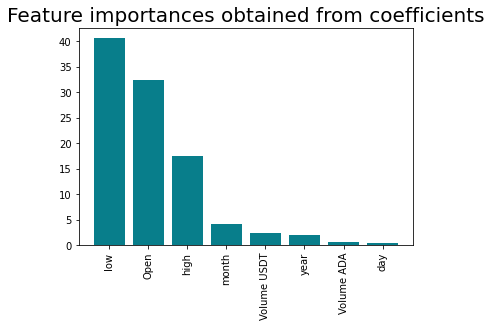

In [32]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

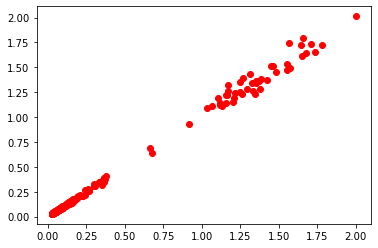

In [33]:
plt.scatter(y_test, LR_model, color = 'red')


In [34]:
mt.mean_absolute_error(y_test, LR_model)

0.01047510488795914

In [35]:
mt.mean_squared_error(y_test, LR_model)

0.0006614277938883667

In [36]:
np.sqrt(mt.mean_squared_error(y_test, LR_model))

0.025718238545599632

In [37]:
mt.r2_score(y_test, LR_model)

0.9965133296113364

LINEAR REGRESSION


In [38]:
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
lr_model = lr.predict(X_test)

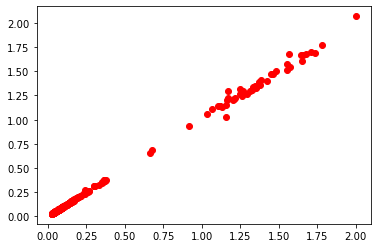

In [40]:
plt.scatter(y_test, lr_model, color = 'red')


In [41]:
mt.r2_score(y_test, lr_model)

0.9988340395425092

LR_test = pd.DataFrame([LR_model, y])
LR_test

In [42]:

Open = float(input("Open price: "))
high = float(input("High: "))
low = float(input("Low: "))
VolumeUSDT = float(input("Volume USDT: "))
VolumeADA = float(input("Volume ADA: "))
date = input("date(dd/mm/yy) and time(24hrs): ")
Date = datetime.strptime(date, '%d/%m/%y %H:%M')
Date.timetuple()
year = Date.timetuple().tm_year
month = Date.timetuple().tm_mon
day = Date.timetuple().tm_mday


Open price: 1.079
High: 1.092
Low: 1.029
Volume USDT: 176186008.57
Volume ADA: 164440861.40
date(dd/mm/yy) and time(24hrs): 12/02/22 19:02


In [48]:
d = {"Open": Open,
     "high": high,
     "low": low,
     "Volume USDT": VolumeUSDT,
     "Volume ADA": VolumeADA,
     "year": year,
     "month": month,
     "day": day,
    }

In [49]:
data = pd.DataFrame(d, index =[0])

In [50]:
data

,Open,high,low,Volume USDT,Volume ADA,year,month,day
0,1.079,1.092,1.029,1.761860e+08,164440861.4,2022,2,12


In [51]:
output = lr.predict(data)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [52]:
data['close'] = output

In [53]:
data

,Open,high,low,Volume USDT,Volume ADA,year,month,day,close
0,1.079,1.092,1.029,1.761860e+08,164440861.4,2022,2,12,1.056845


pip install streamlit

import pickle


pickle_out = open("lr.pkl", "wb")
pickle.dump(lr, pickle_out)
pickle_out.close()

pip install flask
